# Close Prediction

Import some basic libraries.

In [1]:
import pandas as pd                 # pandas is a dataframe library
import matplotlib.pyplot as plt      # matplotlib.pyplot plots data
import numpy as np
from sklearn.preprocessing import Imputer

%matplotlib inline

# Loading and Reviewing the Data

In [2]:
df = pd.read_csv("trainingData1_new.txt")
nrows

In [3]:
df.shape

(2040000, 17)

In [4]:
df.head(5)

,Unnamed: 0,date,stock,binNum,binStartTime,binEndTime,auctionIndicator,volume,binStartPrice,binEndPrice,day_openPrice,day_closePrice,day_lowPrice,day_highPrice,output_remainingVolume,output_closeAuctionVolume,output_closePriceDirection
0,0,d0,stock0,1,09:00:00.000,09:30:00.000,OpenAuction,5500.0,99.54853,99.54853,99.54853,100.1067,99.54853,100.4618,2816000.0,439500.0,1
1,1,d0,stock0,2,09:30:00.000,09:35:00.000,NaN,161500.0,99.54853,100.36030,99.54853,100.1067,99.54853,100.4618,2810500.0,439500.0,1
2,2,d0,stock0,3,09:35:00.000,09:40:00.000,NaN,72500.0,100.36030,100.41110,99.54853,100.1067,99.54853,100.4618,2649000.0,439500.0,1
3,3,d0,stock0,4,09:40:00.000,09:45:00.000,NaN,34500.0,100.30960,100.25890,99.54853,100.1067,99.54853,100.4618,2576500.0,439500.0,1
4,4,d0,stock0,5,09:45:00.000,09:50:00.000,NaN,29500.0,100.25890,100.30960,99.54853,100.1067,99.54853,100.4618,2542000.0,439500.0,1


In [5]:
df.tail(5)

,Unnamed: 0,date,stock,binNum,binStartTime,binEndTime,auctionIndicator,volume,binStartPrice,binEndPrice,day_openPrice,day_closePrice,day_lowPrice,day_highPrice,output_remainingVolume,output_closeAuctionVolume,output_closePriceDirection
2039995,26515,d119,stock249,64,15:40:00.000,15:45:00.000,NaN,300800.0,100.1914,100.35170,99.38989,100.0311,98.58836,100.993,3345600.0,1099600.0,1
2039996,26516,d119,stock249,65,15:45:00.000,15:50:00.000,NaN,484800.0,100.3517,100.19140,99.38989,100.0311,98.58836,100.993,3044800.0,1099600.0,1
2039997,26517,d119,stock249,66,15:50:00.000,15:55:00.000,NaN,565800.0,100.1914,100.19140,99.38989,100.0311,98.58836,100.993,2560000.0,1099600.0,1
2039998,26518,d119,stock249,67,15:55:00.000,16:00:00.000,NaN,894600.0,100.1914,99.87081,99.38989,100.0311,98.58836,100.993,1994200.0,1099600.0,1
2039999,26519,d119,stock249,68,16:00:00.000,16:10:00.000,CloseAuction,1099600.0,100.0311,100.03110,99.38989,100.0311,98.58836,100.993,1099600.0,1099600.0,1


# Check for null values

In [6]:
df.isnull().values.any()

True

# Correlated Feature Check

Helper function that displays correlation by color. Red is most correlated, Blue least.

In [7]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks

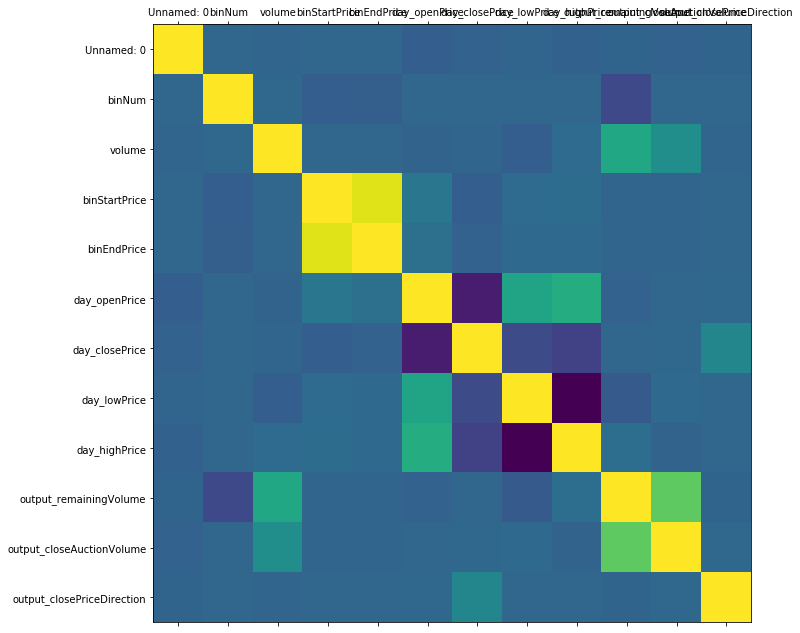

In [8]:
plot_corr(df)

In [9]:
df.corr()

,Unnamed: 0,binNum,volume,binStartPrice,binEndPrice,day_openPrice,day_closePrice,day_lowPrice,day_highPrice,output_remainingVolume,output_closeAuctionVolume,output_closePriceDirection
Unnamed: 0,1.000000,1.419235e-03,-0.004105,0.000451,0.001506,-4.250611e-02,-1.850414e-02,-2.984278e-04,-2.785203e-02,-0.009773,-2.097656e-02,-8.458629e-03
binNum,0.001419,1.000000e+00,0.009554,-0.041142,-0.039201,-7.959700e-20,-1.429107e-20,-1.335431e-19,-1.291800e-19,-0.157455,3.658262e-19,-3.080152e-21
volume,-0.004105,9.553932e-03,1.000000,0.001093,0.005024,-1.353912e-02,-2.872480e-03,-4.344342e-02,3.183712e-02,0.403641,2.478537e-01,-5.856760e-03
binStartPrice,0.000451,-4.114237e-02,0.001093,1.000000,0.927357,9.575605e-02,-4.513454e-02,3.195160e-02,3.489194e-02,-0.002283,-4.445715e-04,1.923974e-03
binEndPrice,0.001506,-3.920146e-02,0.005024,0.927357,1.000000,6.173041e-02,-2.024885e-02,1.877555e-02,1.918518e-02,-0.001463,-1.172107e-03,1.091804e-04
day_openPrice,-0.042506,-7.959700e-20,-0.013539,0.095756,0.061730,1.000000e+00,-3.778274e-01,3.831934e-01,4.314592e-01,-0.019015,2.870908e-03,6.398886e-03
day_closePrice,-0.018504,-1.429107e-20,-0.002872,-0.045135,-0.020249,-3.778274e-01,1.000000e+00,-1.474650e-01,-1.931760e-01,0.002219,1.182667e-02,1.929193e-01
day_lowPrice,-0.000298,-1.335431e-19,-0.043443,0.031952,0.018776,3.831934e-01,-1.474650e-01,1.000000e+00,-4.887010e-01,-0.065981,2.087542e-02,2.545290e-03
day_highPrice,-0.027852,-1.291800e-19,0.031837,0.034892,0.019185,4.314592e-01,-1.931760e-01,-4.887010e-01,1.000000e+00,0.050642,-1.554028e-02,2.891940e-03
output_remainingVolume,-0.009773,-1.574549e-01,0.403641,-0.002283,-0.001463,-1.901471e-02,2.218808e-03,-6.598094e-02,5.064166e-02,1.000000,6.313305e-01,-7.154728e-03


In [10]:
auction_indicator_map = {'OpenAuction':1,'CloseAuction':2,np.NaN:3}
df['auctionIndicator'] = df['auctionIndicator'].map(auction_indicator_map)

In [11]:
df.head(5)

,Unnamed: 0,date,stock,binNum,binStartTime,binEndTime,auctionIndicator,volume,binStartPrice,binEndPrice,day_openPrice,day_closePrice,day_lowPrice,day_highPrice,output_remainingVolume,output_closeAuctionVolume,output_closePriceDirection
0,0,d0,stock0,1,09:00:00.000,09:30:00.000,1,5500.0,99.54853,99.54853,99.54853,100.1067,99.54853,100.4618,2816000.0,439500.0,1
1,1,d0,stock0,2,09:30:00.000,09:35:00.000,3,161500.0,99.54853,100.36030,99.54853,100.1067,99.54853,100.4618,2810500.0,439500.0,1
2,2,d0,stock0,3,09:35:00.000,09:40:00.000,3,72500.0,100.36030,100.41110,99.54853,100.1067,99.54853,100.4618,2649000.0,439500.0,1
3,3,d0,stock0,4,09:40:00.000,09:45:00.000,3,34500.0,100.30960,100.25890,99.54853,100.1067,99.54853,100.4618,2576500.0,439500.0,1
4,4,d0,stock0,5,09:45:00.000,09:50:00.000,3,29500.0,100.25890,100.30960,99.54853,100.1067,99.54853,100.4618,2542000.0,439500.0,1


In [12]:
df.isnull().values.any()

True

In [13]:
num_obs = len(df)
num_1 = len(df.loc[df['output_closePriceDirection'] == 1])
num_0 = len(df.loc[df['output_closePriceDirection'] == 0])
num_minus_1 = len(df.loc[df['output_closePriceDirection'] == -1])
print("Number of 1 cases:  {0} ({1:2.2f}%)".format(num_1, (num_1/num_obs) * 100))
print("Number of 0 cases: {0} ({1:2.2f}%)".format(num_0, (num_0/num_obs) * 100))
print("Number of -1 cases: {0} ({1:2.2f}%)".format(num_minus_1, (num_minus_1/num_obs) * 100))

Number of 1 cases:  807840 (39.60%)
Number of 0 cases: 601052 (29.46%)
Number of -1 cases: 631108 (30.94%)


In [39]:
df.fillna(0, inplace=True)

# rows in dataframe 2040000


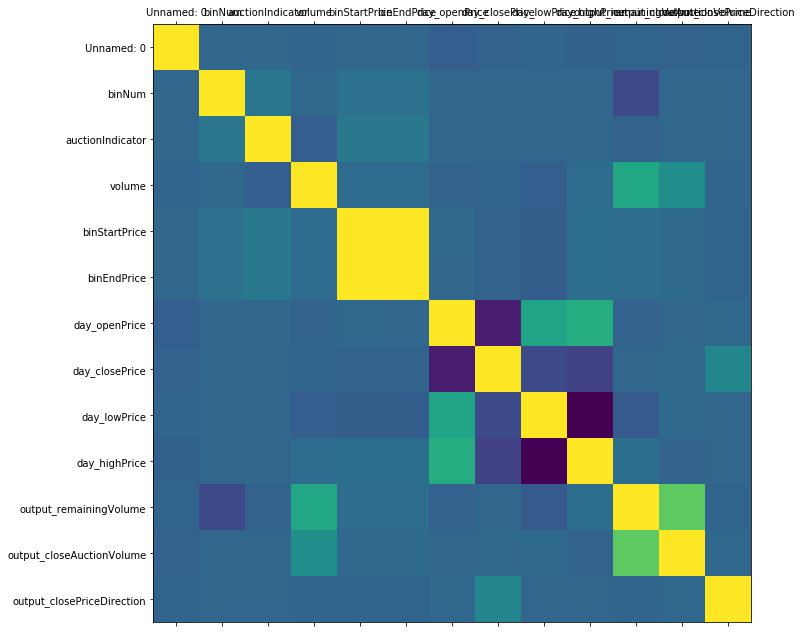

In [40]:
list_of_col = list(df.columns.values)

print("# rows in dataframe {0}".format(len(df)))

# to define plot
def plot_corr(df, size=11):
   corr = df.corr()    # data frame correlation function
   fig, ax = plt.subplots(figsize=(size, size))
   ax.matshow(corr)   # color code the rectangles by correlation value
   plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
   plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks      

plot = plot_corr(df)
cor_data = df.corr()

x_train = df.iloc[:,3:14]
y_train = df.iloc[:,15]

del x_train['binStartTime']
del x_train['binEndTime']


In [41]:
x_train.head(5)

,binNum,auctionIndicator,volume,binStartPrice,binEndPrice,day_openPrice,day_closePrice,day_lowPrice,day_highPrice
0,1,1,5500.0,99.54853,99.54853,99.54853,100.1067,99.54853,100.4618
1,2,3,161500.0,99.54853,100.36030,99.54853,100.1067,99.54853,100.4618
2,3,3,72500.0,100.36030,100.41110,99.54853,100.1067,99.54853,100.4618
3,4,3,34500.0,100.30960,100.25890,99.54853,100.1067,99.54853,100.4618
4,5,3,29500.0,100.25890,100.30960,99.54853,100.1067,99.54853,100.4618


In [43]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None)

In [44]:
# predict values using the training data
nb_predict_train = nb_model.predict(x_train)

# import the performance metrics library
from sklearn import metrics

# Accuracy
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, nb_predict_train)))
print()

MemoryError: 